# Compairing QTLs for Tomato fruit shape & Potato tuber shape on Chromosome 10

Reference tomato have a round fruit shape, while reference potatoes have an elongated tuber shape. Recently published article ([DOI:10.1038/s41467-018-07216-8](https://dx.doi.org/10.1038%2Fs41467-018-07216-8)) reveals that the presence of SLOFP20 on chromosome 10 of tomatoes is responsible for the roundness in fruit shape. However, there is no ortholog of this SLOFP20 in the reference potato DM, and this contributes to elongated tuber. In our python application we map the QTL regions in both tomato and potato, to check how well genes in both the QTL map. Consequently,  we classify genes into 3 categories, genes that occur both in tomato and potato, gene that are unique in tomato, and genes that are unique in potato. Further, we query the GO annotations in every class to see if there is any difference in GO annotations based on classes. This to find a uniqueness of every gene class.

Lastly, we summaries all the properties of the gene SLOFP20 from SGN, Uniprot and Ensembleplants database. 


## Initialization

In [1]:
import orthologs
from IPython.display import Image,SVG
search = orthologs.SEARCH("http://pbg-ld.candygene-nlesc.surf-hosted.nl:8890/sparql")

## Defintions
Genes potato and tomato

In [2]:
#potato
pg1 = "PGSC0003DMG400006678"
pg2 = "PGSC0003DMG400020801"
#tomato
tg1 = "Solyc10g075170.1"
tg2 = "Solyc10g076240.1"

## Potato
### Find interval
Find locations for genes, and compute interval

In [3]:
intervalP = search.compute_interval(pg1, pg2)

,location
gene_id,
PGSC0003DMG400006678,chromosome 10:48978066-48982521
PGSC0003DMG400020801,chromosome 10:49258672-49260078


### Find genes and orthologs
Find genes and orthologs for interval

In [4]:
genesP = search.interval_genes(intervalP)
aggregations = {"ensembl_gene_id" : ["nunique"], "ortholog_gene_id" : ["nunique"]}
display(genesP.groupby(["gene_id"]).agg(aggregations))


,ensembl_gene_id,ortholog_gene_id
,nunique,nunique
gene_id,,
PGSC0003DMG400006679,1,0
PGSC0003DMG400006680,1,0
PGSC0003DMG400006681,1,0
PGSC0003DMG400020795,1,0
PGSC0003DMG400020797,0,0
PGSC0003DMG400020798,1,2
PGSC0003DMG400020799,1,2
PGSC0003DMG400020800,1,2


### Create diagram
Create a diagram for the genes found in the interval

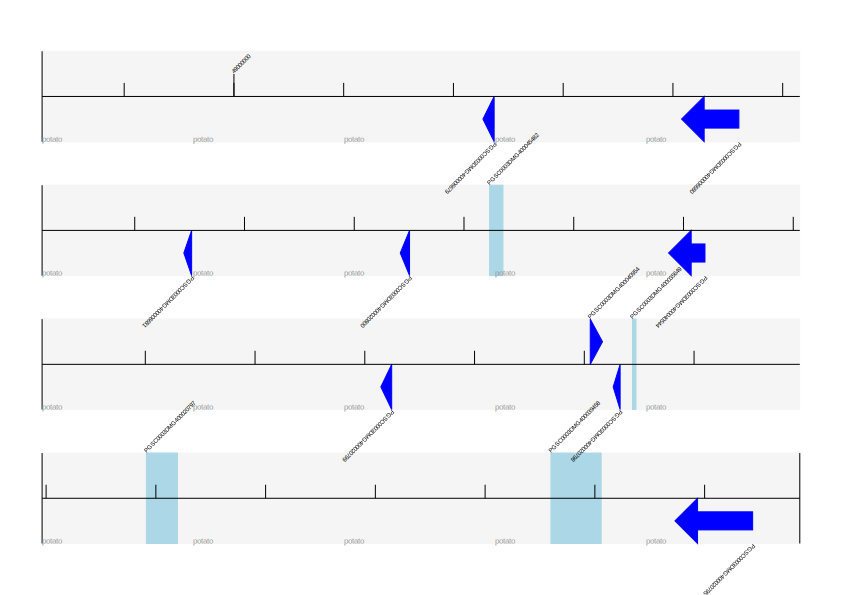

In [5]:
genesPdiagram = search.diagram_genes("potato", intervalP, genesP)
tmpFilename = "potato_"+pg1+"-"+pg2+".svg"
genesPdiagram.write(tmpFilename, "svg")
SVG(tmpFilename)

### List orthologs
List orthologs for the genes found in the interval

In [6]:
display(genesP[["location","ensembl_gene_id","ortholog_gene_id","ortholog_location"]])

,location,ensembl_gene_id,ortholog_gene_id,ortholog_location
gene_id,,,,
PGSC0003DMG400006679,chromosome 10:49022687-49023709,PGSC0003DMG400006679,None,None
PGSC0003DMG400006680,chromosome 10:49040786-49046010,PGSC0003DMG400006680,None,None
PGSC0003DMG400006681,chromosome 10:49064472-49065184,PGSC0003DMG400006681,None,None
PGSC0003DMG400020800,chromosome 10:49084193-49085040,PGSC0003DMG400020800,Solyc10g076220.1,chromosome 10:59059828-59060961:-1
PGSC0003DMG400020800,chromosome 10:49084193-49085040,PGSC0003DMG400020800,Solyc10g076210.1,chromosome 10:59054478-59055612:-1
PGSC0003DMG400020800,chromosome 10:49084193-49085040,PGSC0003DMG400020800,None,None
PGSC0003DMG400045482,chromosome 10:49092329-49093552,None,None,None
PGSC0003DMG400040544,chromosome 10:49108641-49111957,PGSC0003DMG400040544,Solyc01g066890.1,chromosome 1:75142075-75142941:-1
PGSC0003DMG400040544,chromosome 10:49108641-49111957,PGSC0003DMG400040544,Solyc07g041360.1,chromosome 7:52534390-52534818:-1


### Chromosomes for orthologs
Chromosomes containing the found orthologs

In [7]:
kauraggregations = {"ortholog_begin_pos" : ["min","max"], "ortholog_end_pos" : ["min","max"]}
display(genesP.groupby(["ortholog_begin_ref"]).agg(aggregations))

,ensembl_gene_id,ortholog_gene_id
,nunique,nunique
ortholog_begin_ref,,
http://rdf.ebi.ac.uk/resource/ensembl/33/solanum_lycopersicum/SL2.50/1,1,1
http://rdf.ebi.ac.uk/resource/ensembl/33/solanum_lycopersicum/SL2.50/10,4,5
http://rdf.ebi.ac.uk/resource/ensembl/33/solanum_lycopersicum/SL2.50/7,1,1


### Diagram crosslinks
Create a diagram with crosslinks between found genes and orthologs

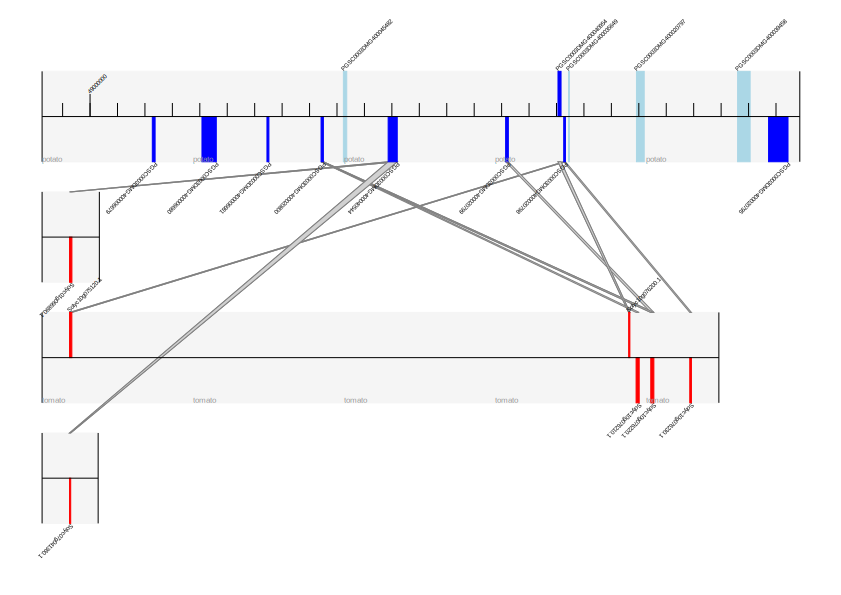

In [8]:
genesPdiagram = search.diagram_crosslinks("potato", "tomato", intervalP, genesP)
tmpFilename = "potato_"+tg1+"-"+tg2+"_crosslinks.svg"
genesPdiagram.write(tmpFilename, "svg")
SVG(tmpFilename)

## Tomato
### Find interval
Find locations for genes, and compute interval

In [9]:
intervalT = search.compute_interval(tg1, tg2)

,location
gene_id,
Solyc10g075170.1,chromosome 10:58891402-58895882
Solyc10g076240.1,chromosome 10:59082990-59084119


### Find genes and orthologs
Find genes and orthologs for interval

In [10]:
genesT = search.interval_genes(intervalT)
aggregations = {"ensembl_gene_id" : ["nunique"], "ortholog_gene_id" : ["nunique"]}
display(genesT.groupby(["gene_id"]).agg(aggregations))

,ensembl_gene_id,ortholog_gene_id
,nunique,nunique
gene_id,,
Solyc10g076170.1,0,0
Solyc10g076180.1,1,0
Solyc10g076190.1,1,1
Solyc10g076200.1,1,2
Solyc10g076210.1,1,2
Solyc10g076220.1,1,2
Solyc10g076230.1,1,1


### Create diagram
Create a diagram for the genes found in the interval

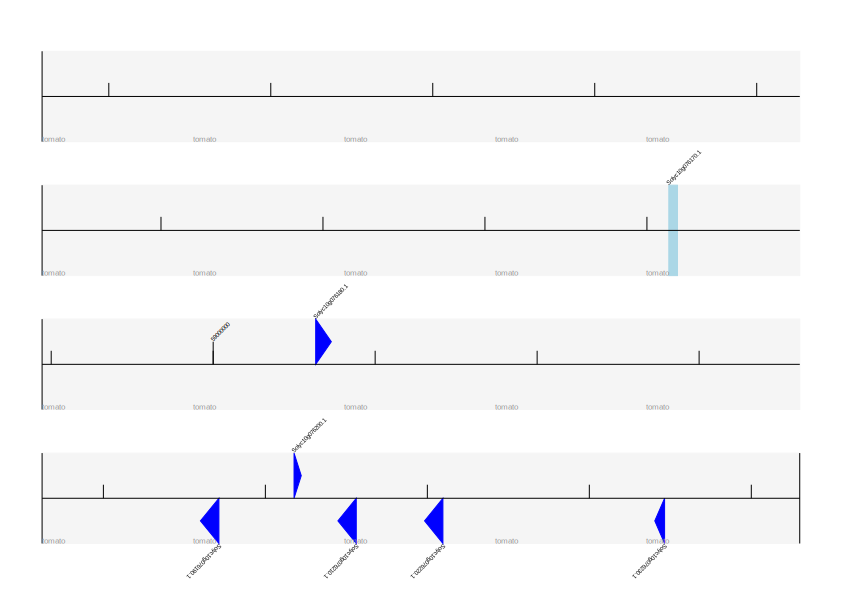

In [11]:
genesTdiagram = search.diagram_genes("tomato", intervalT, genesT)
tmpFilename = "tomato_"+pg1+"-"+pg2+".svg"
genesTdiagram.write(tmpFilename, "svg")
SVG(tmpFilename)

### List orthologs
List orthologs for the genes found in the interval

In [12]:
display(genesT[["location","ensembl_gene_id","ortholog_gene_id","ortholog_location"]])

,location,ensembl_gene_id,ortholog_gene_id,ortholog_location
gene_id,,,,
Solyc10g076170.1,chromosome 10:58981351-58981887,None,None,None
Solyc10g076180.1,chromosome 10:59006329-59007294,Solyc10g076180.1,None,None
Solyc10g076190.1,chromosome 10:59045991-59047132,Solyc10g076190.1,PGSC0003DMG400011948,chromosome 00:22142391-22143721:1
Solyc10g076190.1,chromosome 10:59045991-59047132,Solyc10g076190.1,None,None
Solyc10g076200.1,chromosome 10:59051770-59052216,Solyc10g076200.1,PGSC0003DMG400011955,chromosome 00:22145065-22146428:-1
Solyc10g076200.1,chromosome 10:59051770-59052216,Solyc10g076200.1,PGSC0003DMG400040954,chromosome 10:49170543-49171657:1
Solyc10g076200.1,chromosome 10:59051770-59052216,Solyc10g076200.1,None,None
Solyc10g076210.1,chromosome 10:59054478-59055612,Solyc10g076210.1,PGSC0003DMG400020800,chromosome 10:49084193-49085040:-1
Solyc10g076210.1,chromosome 10:59054478-59055612,Solyc10g076210.1,PGSC0003DMG400020799,chromosome 10:49151461-49152451:-1


### Chromosomes for orthologs
Chromosomes containing the found orthologs

In [13]:
aggregations = {"ortholog_begin_pos" : ["min","max"], "ortholog_end_pos" : ["min","max"]}
display(genesT.groupby(["ortholog_begin_ref"]).agg(aggregations))

ortholog_begin_pos  \
                                                                  min   
ortholog_begin_ref                                                      
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...         22142391.0   
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...         49085040.0   

                                                                \
                                                           max   
ortholog_begin_ref                                               
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...  22146428.0   
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...  49173264.0   

                                                   ortholog_end_pos  \
                                                                min   
ortholog_begin_ref                                                    
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...       22143721.0   
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...       49084193.0   

                                                                
                                                           max  
ortholog_begin_ref                                              
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...  22145065.0  
http://rdf.ebi.ac.uk/resource/ensembl/33/solanu...  49172630.0

### Diagram crosslinks
Create a diagram with crosslinks between found genes and orthologs

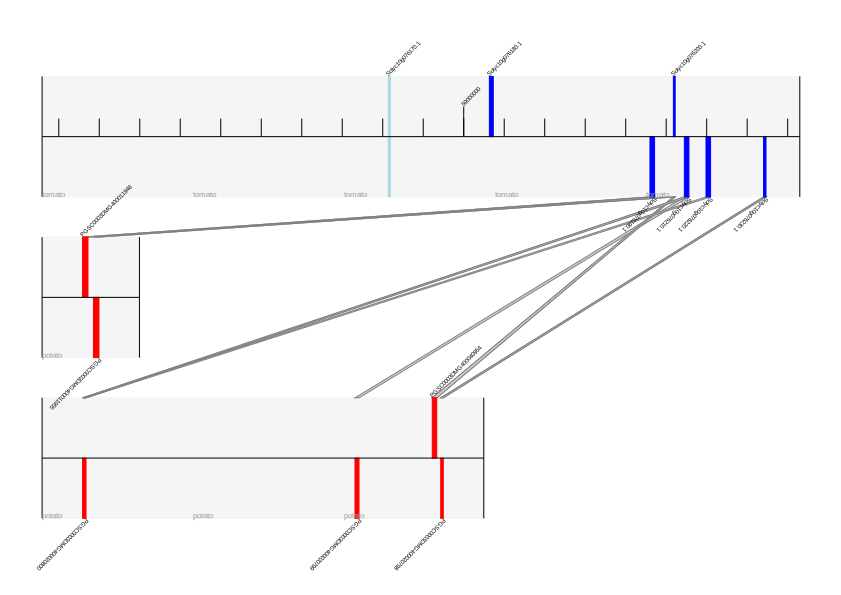

In [14]:
genesTdiagram = search.diagram_crosslinks("tomato", "potato", intervalT, genesT)
tmpFilename = "tomato_"+tg1+"-"+tg2+".svg"
genesTdiagram.write(tmpFilename, "svg")
SVG(tmpFilename)

# Annotations
Genes, orthologs for potato and tomato and annotations

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Potato

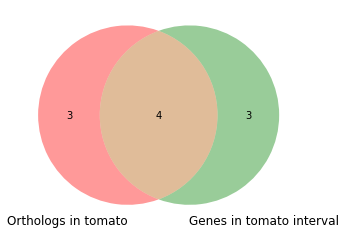

In [16]:
setp1 = genesP["ortholog_gene_id"].dropna().unique()
setp2 = genesT.index.unique()
setp3 = setp2 & setp1
setp1 = list(set(setp1)-set(setp3))
setp2 = list(set(setp2)-set(setp3))
venn2(subsets = (len(setp1), len(setp2), len(setp3)), set_labels = ("Orthologs in tomato", "Genes in tomato interval"))
plt.show()


## Not in tomato interval

In [17]:
print(*setp1, sep = "\n")

Solyc07g041360.1
Solyc01g066890.1
Solyc10g075120.1


In [18]:
termp1 = search.gene_annotations(setp1)["term"].dropna().unique()
print(*termp1, sep = "\n")

peroxidase activity
response to oxidative stress
heme binding


## Orthologs potato in tomato interval

In [19]:
print(*setp3, sep = "\n")

Solyc10g076200.1
Solyc10g076210.1
Solyc10g076220.1
Solyc10g076230.1


In [20]:
termp3 = search.gene_annotations(setp3)["term"].dropna().unique()
print(*termp3, sep = "\n")

peroxidase activity
extracellular region
lipid transport
response to oxidative stress
lipid binding
metal ion binding
heme binding
hydrogen peroxide catabolic process


## Only in tomato interval

In [21]:
print(*setp2, sep = "\n")

Solyc10g076180.1
Solyc10g076190.1
Solyc10g076170.1


In [22]:
termp2 = search.gene_annotations(setp2)["term"].dropna().unique()
print(*termp2, sep = "\n")

DNA binding
peroxidase activity
extracellular region
response to oxidative stress
negative regulation of transcription, DNA-templated
metal ion binding
heme binding
hydrogen peroxide catabolic process


# Tomato

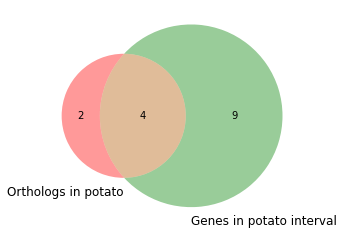

In [23]:
sett1 = genesT["ortholog_gene_id"].dropna().unique()
sett2 = genesP.index.unique()
sett3 = sett2 & sett1
sett1 = list(set(sett1)-set(sett3))
sett2 = list(set(sett2)-set(sett3))
venn2(subsets = (len(sett1), len(sett2), len(sett3)), set_labels = ("Orthologs in potato", "Genes in potato interval"))
plt.show()

## Not in potato interval

In [24]:
#genes
print(*sett1, sep = "\n")

PGSC0003DMG400011955
PGSC0003DMG400011948


In [25]:
#annotations
termt1 = search.gene_annotations(sett1)["term"].dropna().unique()
print(*termt1, sep = "\n")

peroxidase activity
extracellular region
lipid transport
response to oxidative stress
lipid binding
metal ion binding
heme binding
hydrogen peroxide catabolic process


## Orthologs tomato in potato interval

In [26]:
#genes
print(*sett3, sep = "\n")

PGSC0003DMG400020800
PGSC0003DMG400020799
PGSC0003DMG400040954
PGSC0003DMG400020798


In [27]:
#annotations
termt3 = search.gene_annotations(sett3)["term"].dropna().unique()
print(*termt3, sep = "\n")

peroxidase activity
lipid transport
response to oxidative stress
lipid binding
metal ion binding
heme binding
hydrogen peroxide catabolic process


## Only in potato interval

In [28]:
#genes
print(*sett2, sep = "\n")

PGSC0003DMG400006679
PGSC0003DMG400020797
PGSC0003DMG400040544
PGSC0003DMG400039458
PGSC0003DMG400006681
PGSC0003DMG400006680
PGSC0003DMG400045482
PGSC0003DMG400020795
PGSC0003DMG400035649


In [29]:
#annotations
termt2 = search.gene_annotations(sett2)["term"].dropna().unique()
print(*termt2, sep = "\n")

peroxidase activity
response to oxidative stress
metal ion binding
heme binding
hydrogen peroxide catabolic process
